# <center> MATH2308 Project - Aliya Noe

### <center> Introduction
In the show Ticketmaster the contestants earn points by completeling tasks. The contestants sits in assigned seats during every episode. The seating order is in alphabetical order but there might be certain seats that recieve more attention or perform better. For this project I will explore whether being in a particular seat position affect performance using exploratory visualizations and a linear regression model.

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

taskmaster = pd.read_csv('taskmaster25.csv')
taskmaster.head()

,Series,Contestant,PPT,Prize,Subjective,Objective,Fastest,Live,Team,Highest,Lowest,Age,Gender,GregHarshnessRating,Seat,Height,Handedness,Children,Winner,Place,ChineseYear,FacialHair,HairColour,Books,Helped,RefusedHelp,Headwear,ComedyAward,Diet,OutfitColor,Language,SecondLanguage,Siblings,BirthOrder
0,1,Josh Widdicombe,2.94,3.00,2.82,3.00,3.00,2.67,0.67,22,9,58,M,1.04,2,169.0,R,0,Y,1,Pig,N,Blonde,2.0,0.0,0.0,N,Nom,Veggie,Black,No,NaN,1,Youngest
1,1,Romesh Ranganathan,2.91,2.67,2.91,2.90,2.29,3.00,0.67,22,10,32,M,1.04,4,182.0,R,3,N,2,Horse,Beard,Black,2.0,0.0,0.0,N,Nom,Vegan,Black,No,NaN,1,Oldest
2,1,Frank Skinner,2.91,3.50,3.18,2.76,2.57,2.50,1.67,20,9,36,M,1.04,1,178.0,R,1,N,2,Monkey,N,Grey,5.0,1.0,0.0,N,Y,Meat,Black,No,NaN,3,Youngest
3,1,Tim Key,2.75,4.17,3.36,2.43,2.14,2.83,1.67,18,9,37,M,1.04,5,177.8,R,0,N,4,Dragon,Stubble beard,Brown,5.0,2.0,0.0,N,Y,Meat,Red,Yes,Russian,1,Youngest
4,1,Roisin Conaty,2.13,1.67,1.91,2.24,2.43,2.33,0.67,21,7,38,F,1.04,3,173.0,R,0,N,5,Goat,N,Blonde,0.0,2.0,0.0,N,Y,Meat,Pink,No,NaN,1,Oldest


### <center> Initial Exploration 

In [94]:
# For this project I will only be looking into 5 variables for simplicity. So, I'm putting them in their own dataset abd converting the
# categories since Seat was an integer and Winner was an object

cols = ['Seat', 'PPT', 'Prize', 'Subjective', 'Winner']
data = taskmaster[cols].copy()

data.Seat = data.Seat.astype('category')
data.Winner = data.Winner.astype('category')

# Checking for NAs
print(data.isna().sum())

# Checking for irregular values
print(data.Seat.unique())
print(data.PPT.unique())
print(data.Prize.unique())
print(data.Subjective.unique())
print(data.Winner.unique())

Seat          0
PPT           0
Prize         0
Subjective    0
Winner        0
dtype: int64
[2, 4, 1, 5, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[2.94 2.91 2.75 2.13 3.36 3.21 3.07 2.79 2.46 3.22 3.   2.96 2.67 2.44
 3.2  3.02 2.98 2.87 2.78 2.93 2.49 3.23 3.13 3.04 2.84 2.71 3.26 3.24
 3.09 3.06 2.83 2.7  2.57 3.34 3.18 3.16 3.08 2.56 3.1  2.73 2.31 2.74
 2.5  2.42 3.46 3.4  3.14 3.68 3.48 2.88 2.62 2.58 3.84 3.42 2.82 3.38]
[3.   2.67 3.5  4.17 1.67 3.4  2.8  2.2  3.2  2.6  3.75 2.25 1.63 4.25
 3.13 2.88 3.25 2.13 2.9  3.8  2.3  2.4  3.3  3.1  3.6  2.5  3.9  2.1
 2.7  3.7 ]
[2.82 2.91 3.18 3.36 1.91 3.42 2.83 3.   2.92 3.58 2.33 3.95 3.32 2.93
 2.29 2.78 3.14 3.52 2.9  3.19 2.81 3.57 3.45 2.75 2.59 2.98 3.13 3.02
 2.71 3.07 3.24 2.89 3.16 3.27 3.49 3.38 3.05 3.25 2.7  3.2  3.22 3.39
 3.17 3.76 3.66 3.35 3.72 3.44 3.63 3.74 2.74 3.11 3.59 3.5  3.65 2.61
 2.85 2.88 3.55 2.8  3.3  3.43]
['Y', 'N']
Categories (2, object): ['N', 'Y']


In [95]:
# summary stats for the numeric variables
data[['PPT', 'Prize', 'Subjective']].describe().round(2)

,PPT,Prize,Subjective
count,95.00,95.00,95.00
mean,2.99,3.04,3.14
std,0.30,0.54,0.37
min,2.13,1.63,1.91
25%,2.80,2.70,2.90
50%,3.02,3.00,3.16
75%,3.18,3.40,3.42
max,3.84,4.25,3.95


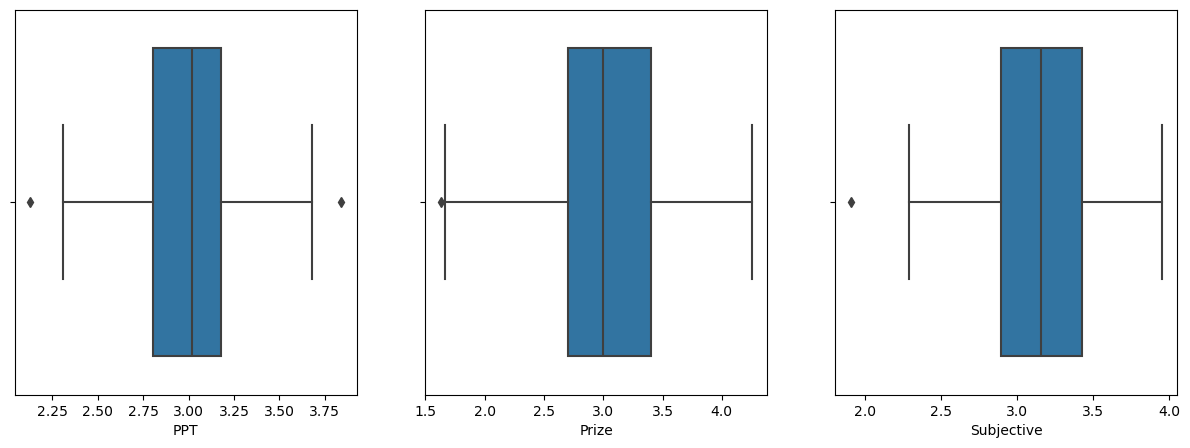

In [96]:
# checking for outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='PPT', data= data, ax=axes[0])
sns.boxplot(x='Prize', data= data, ax=axes[1])
sns.boxplot(x='Subjective', data= data, ax=axes[2])
plt.show()

Although some of the variables had some outliers adn were slightly outside of the IQR, I'm not going to winsorize since they are real values of the data instead of data errors. Removing them would probably make the regression lose meaning.

### <center> Visualizations for Seat and Performace 

/Users/salimanoe/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/salimanoe/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/salimanoe/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

<Axes: xlabel='Seat', ylabel='count'>

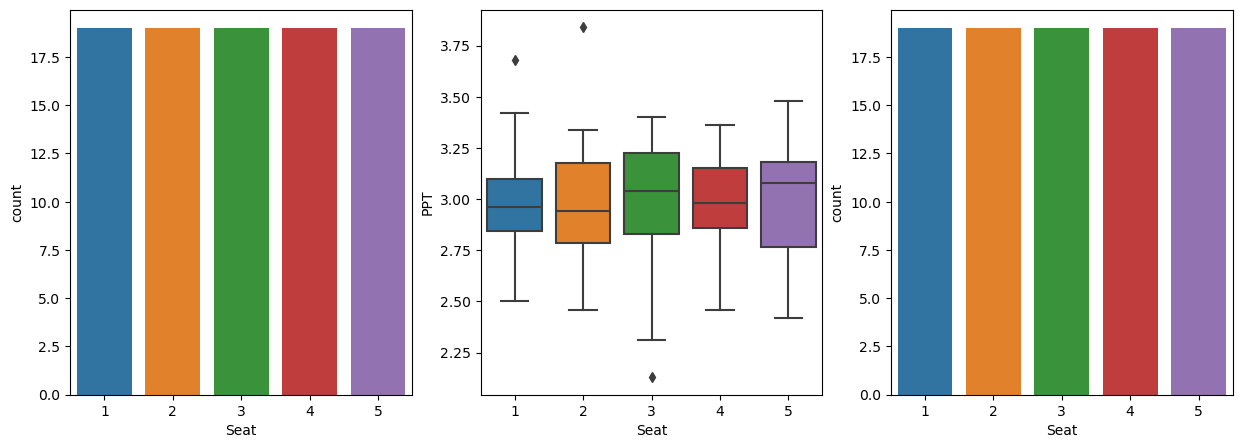

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Seat', data= data, ax=axes[0])
sns.boxplot(x='Seat', y='PPT', data= data, ax=axes[1])
sns.countplot(x='Seat', data= data, ax=axes[2])

So from the first plot we can see that the distribution of contestants across the seats is even. The boxplot of PPT by seat shows that Seat 3 and Seat 5 have a higher median performance, while Seat 1 and Seat 2 are lower.

### <center> Modeling

In [102]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# linear regression model
model = smf.ols("PPT ~ C(Seat)", data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPT   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.1546
Date:                Sun, 30 Nov 2025   Prob (F-statistic):              0.960
Time:                        20:16:49   Log-Likelihood:                -19.277
No. Observations:                  95   AIC:                             48.55
Df Residuals:                      90   BIC:                             61.32
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9911      0.070     42.812   

## <center> Conclustion
Using a linear regression, I tried to test wheter the seat position would predict the cotestants performance (PPT). The model wasn't that significant with the r-squared being .007, the seat position really only explained less than 1% of the variation in PPT. None of the coefficients were significant either, so the contestants would perform similarly regardless of their seat. Therefore, I came to the conclusion that the seat position does not have a meaningful effect on their performance. 